In [1]:
# importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import re
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer 

from sklearn.metrics import make_scorer, accuracy_score, f1_score
from sklearn.model_selection import KFold, cross_val_score, GridSearchCV

from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression


In [2]:
news_df = pd.read_csv(r"E:\BRACU\6. CSE718_Petri_Net\project\dataset\dataset 2\train.csv")

In [3]:
news_df.head()

,id,title,author,text,label
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1


In [4]:
news_df['label'].value_counts()

1    10413
0    10387
Name: label, dtype: int64

In [5]:
# preprocessing


news_df.isnull().sum()

id           0
title      558
author    1957
text        39
label        0
dtype: int64

In [6]:
news_df.shape

(20800, 5)

In [7]:
news_df = news_df.fillna(' ')

In [8]:
news_df.isnull().sum()

id        0
title     0
author    0
text      0
label     0
dtype: int64

In [9]:
news_df['content'] = news_df['author']+' '+news_df['title']

In [10]:
news_df.head()

,id,title,author,text,label,content
0,0,House Dem Aide: We Didn’t Even See Comey’s Let...,Darrell Lucus,House Dem Aide: We Didn’t Even See Comey’s Let...,1,Darrell Lucus House Dem Aide: We Didn’t Even S...
1,1,"FLYNN: Hillary Clinton, Big Woman on Campus - ...",Daniel J. Flynn,Ever get the feeling your life circles the rou...,0,"Daniel J. Flynn FLYNN: Hillary Clinton, Big Wo..."
2,2,Why the Truth Might Get You Fired,Consortiumnews.com,"Why the Truth Might Get You Fired October 29, ...",1,Consortiumnews.com Why the Truth Might Get You...
3,3,15 Civilians Killed In Single US Airstrike Hav...,Jessica Purkiss,Videos 15 Civilians Killed In Single US Airstr...,1,Jessica Purkiss 15 Civilians Killed In Single ...
4,4,Iranian woman jailed for fictional unpublished...,Howard Portnoy,Print \nAn Iranian woman has been sentenced to...,1,Howard Portnoy Iranian woman jailed for fictio...


In [11]:
# data seprate

X = news_df.drop('label', axis = 1)
y = news_df['label']

In [12]:
print(X)

          id                                              title  \
0          0  House Dem Aide: We Didn’t Even See Comey’s Let...   
1          1  FLYNN: Hillary Clinton, Big Woman on Campus - ...   
2          2                  Why the Truth Might Get You Fired   
3          3  15 Civilians Killed In Single US Airstrike Hav...   
4          4  Iranian woman jailed for fictional unpublished...   
...      ...                                                ...   
20795  20795  Rapper T.I.: Trump a ’Poster Child For White S...   
20796  20796  N.F.L. Playoffs: Schedule, Matchups and Odds -...   
20797  20797  Macy’s Is Said to Receive Takeover Approach by...   
20798  20798  NATO, Russia To Hold Parallel Exercises In Bal...   
20799  20799                          What Keeps the F-35 Alive   

                                          author  \
0                                  Darrell Lucus   
1                                Daniel J. Flynn   
2                             Consortiu

In [13]:
# stemmar

ps = PorterStemmer()
def stemming(content):
    stemmed_content = re.sub('[^a-zA-Z]',' ',content)
    stemmed_content = stemmed_content.lower()
    stemmed_content = stemmed_content.split()
    stemmed_content = [ps.stem(word) for word in stemmed_content if not word in stopwords.words('english')]
    stemmed_content = ' '.join(stemmed_content)
    return stemmed_content

# # Initialize WordNet Lemmatizer
# lemmatizer = WordNetLemmatizer()

# def lemmatization(content):
#     # Remove non-alphabetic characters and tokenize
#     tokens = re.findall(r'\b\w+\b', content.lower())
#     # Lemmatize tokens, remove stopwords, and join them back into a string
#     lemmatized_content = ' '.join([lemmatizer.lemmatize(word) for word in tokens if word not in stopwords.words('english')])
#     return lemmatized_content

# # Example usage:
# # lemmatized_text = lemmatization("This is a sample text for lemmatization")
# # print(lemmatized_text)


In [14]:
news_df['content'] = news_df['content'].apply(stemming)

In [15]:
news_df['content']

0        darrel lucu hous dem aid even see comey letter...
1        daniel j flynn flynn hillari clinton big woman...
2                   consortiumnew com truth might get fire
3        jessica purkiss civilian kill singl us airstri...
4        howard portnoy iranian woman jail fiction unpu...
                               ...                        
20795    jerom hudson rapper trump poster child white s...
20796    benjamin hoffman n f l playoff schedul matchup...
20797    michael j de la merc rachel abram maci said re...
20798    alex ansari nato russia hold parallel exercis ...
20799                            david swanson keep f aliv
Name: content, Length: 20800, dtype: object

In [16]:
X = news_df['content'].values
y = news_df['label'].values

In [17]:
# converting the textual data to numerical data

vector = TfidfVectorizer()
vector.fit(X)
X = vector.transform(X)

In [18]:
print(X)

  (0, 15686)	0.28485063562728646
  (0, 13473)	0.2565896679337957
  (0, 8909)	0.3635963806326075
  (0, 8630)	0.29212514087043684
  (0, 7692)	0.24785219520671603
  (0, 7005)	0.21874169089359144
  (0, 4973)	0.233316966909351
  (0, 3792)	0.2705332480845492
  (0, 3600)	0.3598939188262559
  (0, 2959)	0.2468450128533713
  (0, 2483)	0.3676519686797209
  (0, 267)	0.27010124977708766
  (1, 16799)	0.30071745655510157
  (1, 6816)	0.1904660198296849
  (1, 5503)	0.7143299355715573
  (1, 3568)	0.26373768806048464
  (1, 2813)	0.19094574062359204
  (1, 2223)	0.3827320386859759
  (1, 1894)	0.15521974226349364
  (1, 1497)	0.2939891562094648
  (2, 15611)	0.41544962664721613
  (2, 9620)	0.49351492943649944
  (2, 5968)	0.3474613386728292
  (2, 5389)	0.3866530551182615
  (2, 3103)	0.46097489583229645
  :	:
  (20797, 13122)	0.2482526352197606
  (20797, 12344)	0.27263457663336677
  (20797, 12138)	0.24778257724396507
  (20797, 10306)	0.08038079000566466
  (20797, 9588)	0.174553480255222
  (20797, 9518)	0.295420

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, stratify=y, random_state=2)

In [20]:
X_train.shape

(16640, 17128)

In [21]:
y_train.shape

(16640,)

In [22]:
# K-fold cross-validation
def k_fold_cross_validation_f1(model, X, y, cv=5):
    k_fold = KFold(n_splits=cv, shuffle=True, random_state=42)
    f1 = cross_val_score(model, X, y, cv=k_fold, scoring=make_scorer(f1_score))
    print("Cross-validation F1 scores:", f1)
    print("Mean F1 score:", f1.mean())

Optimal value of k using elbow method: 1


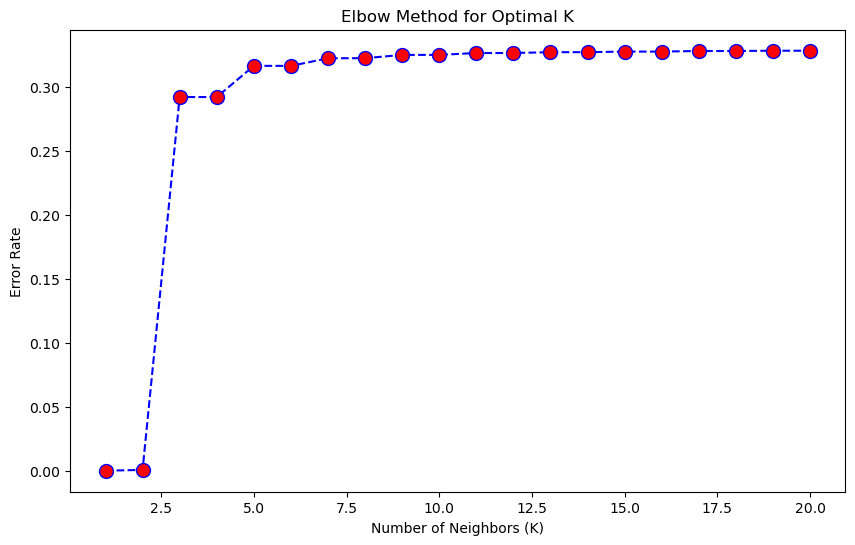

Cross-validation F1 scores KNN: [0.69741854 0.70890339 0.70874397 0.70548523 0.69142615]
Mean F1 score KNN: 0.7023954548160154


In [23]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import KFold, cross_val_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score

# Function to find optimal k using elbow method
def find_optimal_k(X_train, y_train):
    k_values = range(1, 21)
    error_rates = []
    for k in k_values:
        knn = KNeighborsClassifier(n_neighbors=k)
        knn.fit(X_train, y_train)
        pred_i = knn.predict(X_train)
        error_rates.append(1 - f1_score(y_train, pred_i))
    optimal_k = error_rates.index(min(error_rates)) + 1
    print("Optimal value of k using elbow method:", optimal_k)
    # Plotting the elbow curve
    plt.figure(figsize=(10, 6))
    plt.plot(k_values, error_rates, color='blue', linestyle='dashed', marker='o', markerfacecolor='red', markersize=10)
    plt.title('Elbow Method for Optimal K')
    plt.xlabel('Number of Neighbors (K)')
    plt.ylabel('Error Rate')
    plt.show()
    return optimal_k

# Applying k-nearest neighbors with cross-validation and optimal k
def knn_with_cross_validation(X, y, cv=5):
    optimal_k = find_optimal_k(X, y)
    knn = KNeighborsClassifier(n_neighbors=optimal_k)
    k_fold = KFold(n_splits=cv, shuffle=True, random_state=42)
    f1_scores = cross_val_score(knn, X, y, cv=k_fold, scoring=make_scorer(f1_score))
    print("Cross-validation F1 scores KNN:", f1_scores)
    print("Mean F1 score KNN:", f1_scores.mean())

# Example usage:
knn_with_cross_validation(X_train, y_train)


Best parameters: {'max_depth': 30, 'n_estimators': 100}
Cross-validation F1 scores: [0.95969626 0.95846462 0.9618016  0.95088521 0.94693878]
Mean F1 score: 0.9555572930626118


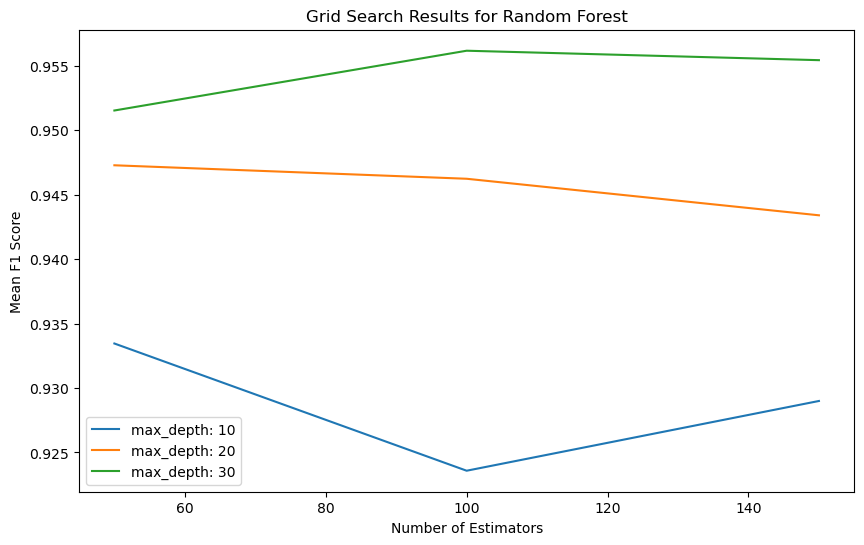

In [24]:
# Function to perform Random Forest classification with hyperparameter tuning
def random_forest_with_cross_validation(X, y, cv=5):
    # Define parameter grid for GridSearchCV
    param_grid = {'n_estimators': [50, 100, 150],
                  'max_depth': [10, 20, 30]}
    # Initialize Random Forest classifier
    rf = RandomForestClassifier(random_state=42)
    # Perform hyperparameter tuning using GridSearchCV
    grid_search = GridSearchCV(rf, param_grid, cv=cv, scoring='f1')
    grid_search.fit(X, y)
    # Print best parameters
    print("Best parameters:", grid_search.best_params_)
    # Initialize Random Forest classifier with best parameters
    best_rf = grid_search.best_estimator_
    # Perform k-fold cross-validation for F1 score
    k_fold = KFold(n_splits=cv, shuffle=True, random_state=42)
    f1_scores = cross_val_score(best_rf, X, y, cv=k_fold, scoring=make_scorer(f1_score))
    # Print F1 scores
    print("Cross-validation F1 scores:", f1_scores)
    print("Mean F1 score:", f1_scores.mean())

    # Visualize hyperparameter tuning results
    n_estimators = [50, 100, 150]
    max_depth = [10, 20, 30]
    scores = grid_search.cv_results_['mean_test_score'].reshape(len(max_depth), len(n_estimators))
    plt.figure(figsize=(10, 6))
    for ind, i in enumerate(max_depth):
        plt.plot(n_estimators, scores[ind], label='max_depth: ' + str(i))
    plt.title("Grid Search Results for Random Forest")
    plt.xlabel('Number of Estimators')
    plt.ylabel('Mean F1 Score')
    plt.legend()
    plt.show()

# Example usage:
random_forest_with_cross_validation(X_train, y_train)